In [155]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [156]:
class GradientDescent:
    def __init__(self, f, df, alpha=0.01, eps=1e-6):
        self.f = f
        self.df = df
        self.alpha = alpha
        self.eps = eps
        self.path = None
        
    def solve(self, init):
        x = init
        path = []
        grad = self.df(x)
        path.append(x)
        while (grad**2).sum() >= self.eps**2:
            x = x -  self.alpha * grad
            grad = self.df(x)
            path.append(x)
        self.path = np.array(path)
        self.x_ = x
        self.opt_ = self.f(x)

In [157]:
def df(xx):
#    assert xx.ndim == 1, "Dimension of input array should be 1"
    x, y = xx
    return np.array([10*x - 6*y + 6, 6*y - 6*x - 6])

In [158]:
def f(xx):
#    assert xx.ndim == 1, "Dimension of input array should be 1"
    x, y = xx
    return 5 * x**2 - 6 * x * y + 3 * y**2 + 6 * x - 6 * y

In [159]:
algo = GradientDescent(f, df, alpha=0.12)
initial = np.array([1., 1.]) # float型にする必要がある
algo.solve(initial)

In [160]:
algo.x_

array([3.09875774e-07, 1.00000043e+00])

In [161]:
algo.opt_

-2.999999999999766

In [162]:
initial

array([1., 1.])

In [163]:
xx.shape

(2, 90000)

In [164]:
f(xx)

array([8.        , 7.97413899, 7.95006767, ..., 7.62899744, 7.81360387,
       8.        ])

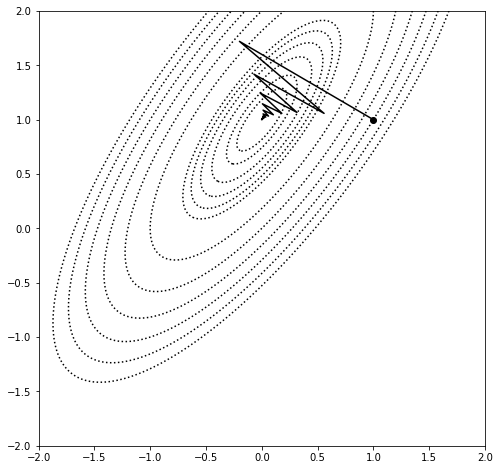

In [165]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(initial[0], initial[1], color="k", marker="o")
ax.plot(algo.path[:,0], algo.path[:,1], color="k", linewidth=1.5)
xs = np.linspace(-2,2,300)
ys = np.linspace(-2,2,300)
xmesh, ymesh = np.meshgrid(xs, ys)
xx = np.r_[xmesh.reshape(1,-1), ymesh.reshape(1,-1)]
levels = [-3, -2.9, -2.8, -2.6, -2.4, -2.2, -2, -1, 0, 1, 2, 3 ,4]
plt.contour(xs, ys, f(xx).reshape(xmesh.shape), levels=levels, colors="k", linestyles="dotted")
plt.show()

In [142]:
def newton1dim(f, df, x0=1, eps=1e-6, max_iter=1000):
    x = x0
    iter_ = 0
    while True:
        iter_ += 1
        x_new = x - f(x)/df(x)
        if abs(x_new - x) <= eps:
            break
        elif iter_ >= max_iter:
            break
        x = x_new
    return x

In [170]:
def f(x):
    return x**3 - 5*x + 1

def df(x):
    return 3 * x**2 - 5

In [192]:
print(newton1dim(f, df, 1.2))

-2.3300587396859846


In [171]:
print(newton1dim(f, df, 2))

2.1284190810970376


In [172]:
print(newton1dim(f, df, 100))

2.1284190638551617


In [173]:
print(newton1dim(f, df, -10))

-2.330058739571703


In [174]:
xs = np.linspace(-10, 10, num=1000)

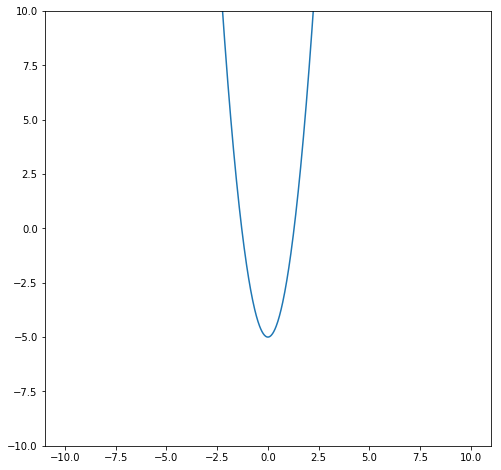

In [177]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(xs, df(xs))
ax.set_ylim(-10,10)
plt.show()

多変数に拡張

In [213]:
class Newton:
    def __init__(self, f, df, eps=1e-10, max_iter=1000):
        self.f = f
        self.df = df
        self.eps = eps
        self.max_iter = max_iter
        
    def solve(self, x0):
        x = x0
        iter_ = 0
        self.path_ = x0.reshape(1,-1) # 最適化したい変数が複数あるので、np.arrayで持っている
        while True:
            x_new = x - np.linalg.inv(self.df(x)) @ self.f(x)
            self.path_ = np.r_[self.path_, x_new.reshape(1,-1)]
            if ((x_new - x)**2).sum() < self.eps**2:
                break
            iter_ += 1
            if iter_ >= self.max_iter:
                break
            x = x_new
        return x_new

In [214]:
def f1(x, y):
    return x**3 - 2*y

def f2(x, y):
    return x**2 + y**2 - 1

def f(xx):
    x = xx[0]
    y = xx[1]
    return np.array([f1(x, y), f2(x, y)])

In [215]:
f(np.array([[1,2,3], [2,3,4]]))

array([[-3,  2, 19],
       [ 4, 12, 24]])

In [216]:
def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([[3 * x**2, -2], [2 * x, 2 * y]])

In [217]:
solver = Newton(f, df)

In [218]:
solver.solve(np.array([1,1]))

array([0.92071038, 0.39024659])

In [219]:
solver.path_.shape

(7, 2)

[-0.92071038 -0.39024659]
[0.92071038 0.39024659]
[-0.92071038 -0.39024659]
[0.92071038 0.39024659]


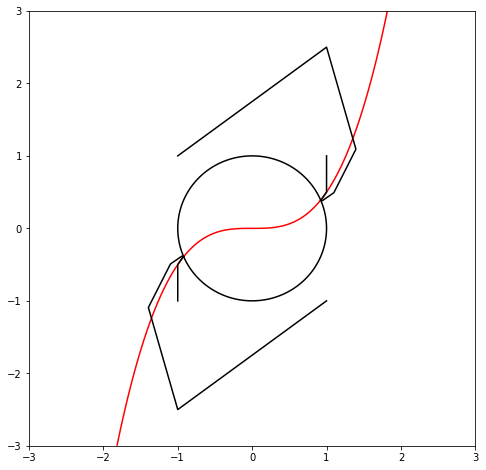

In [222]:
xmin, xmax, ymin, ymax = -3, 3, -3, 3
x = np.linspace(xmin, xmax, 200)
y = np.linspace(ymin, ymax, 200)

xmesh, ymesh = np.meshgrid(x, y)
z1 = f1(xmesh, ymesh)
z2 = f2(xmesh, ymesh)

fig, ax = plt.subplots(figsize=(8, 8))
ax.contour(xmesh, ymesh, z1, colors="r", levels=[0])
ax.contour(xmesh, ymesh, z2, colors="k", levels=[0])
solver = Newton(f, df)

initials = [np.array([-1,-1]), np.array([-1,1]), np.array([1,-1]), np.array([1,1])]
markers = ["+", "*", "x", "^"]
for x0, m in zip(initials, markers):
    sol = solver.solve(x0)
    plt.plot(solver.path_[:,0], solver.path_[:,1], color="k")
    print(sol)

plt.show()

連立方程式がNewton法で解けた